In [1]:
print("Welcome to Machine Learning")

Welcome to Machine Learning


In [2]:
pip install pathlib pandas xtarfile urllib3

Note: you may need to restart the kernel to use updated packages.


# Download and Load the data

In [3]:
from pathlib import Path
import pandas as pd
import tarfile as tarfile
import urllib3
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        http = urllib3.PoolManager()
        response = http.request('GET', url, preload_content=False)
        with open(tarball_path, 'wb') as out_file:
            if response.status == 200:
                out_file.write(response.read())
            else:
                raise ValueError(f"Failed to download data: HTTP {response.status}")
                
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
        
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [4]:
housing = load_housing_data()
housing.head()

C:\Users\vishn\AppData\Local\Temp\ipykernel_22264\862966989.py:19: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Take a Quick Look at the Data Strcuture

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that the total_bed_rooms attribute has only 20433 non-null values, meaning that 207 districts are missing this feature. We will need to take care this later

All attributes are numerical, except the ocean_proximity field. when we looked at the top five rows, you probably noticed that the values in that column were repetitive, which means that it is probably a categorical attribute. you can find out what categoried exist and how many distrits belong to each category bu using the value_count() method

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


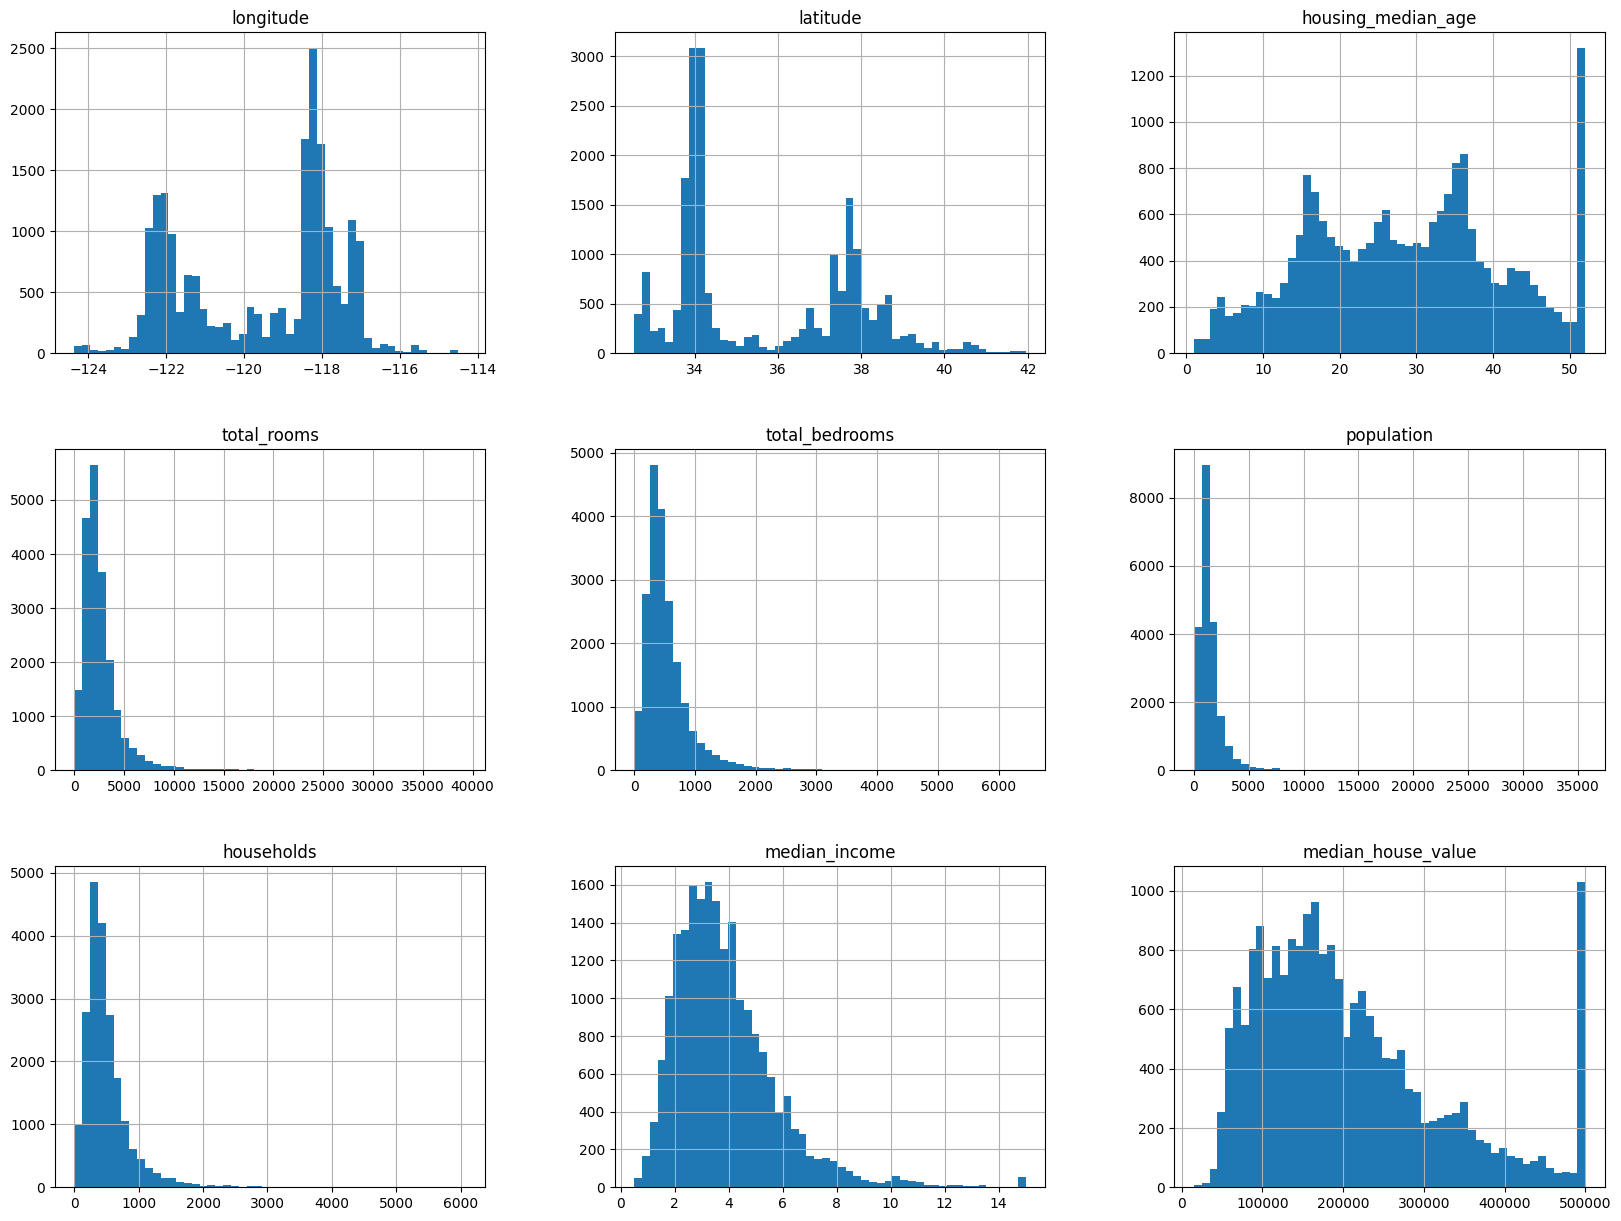

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Create a test set

### Creating test set manually

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    #To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

### Creating test set with scikit-learn

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print("train: ", len(train_set), " test: ",len(test_set))

train:  16512  test:  4128


In [12]:
pip install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), len(test_set))

16512 4128


In [14]:
print(train_set["total_bedrooms"].isnull().sum())
print(test_set["total_bedrooms"].isnull().sum())

163
44


### Some explanation to understand Stratified sampling

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [19]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
probability_too_small = binom(sample_size, ratio_female).cdf(485-1)
probability_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print("P(X<485): ",probability_too_small, "P(X>535): ",probability_too_large)
print(probability_too_small+probability_too_large)

P(X<485):  0.0468450218634498 P(X>535):  0.06052296344584962
0.10736798530929942


Suppose experts told that the median income is the very important attribute to predict modein housing prices. you may want to ensure that the test set is representative of the various categories of the incomes in  the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

In [22]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

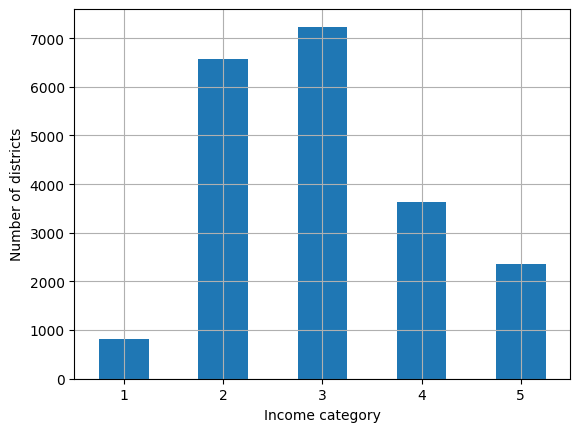

In [26]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Now we are ready to do stratified sampling based on  the income category.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
start_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    start_train_set_n = housing.iloc[train_index]
    start_test_set_n = housing.iloc[test_index]
    start_splits.append([start_train_set_n, start_test_set_n])

In [33]:
start_train_set, start_test_set = start_splits[0]
print(start_train_set, start_test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  media

### Stratified sampling using scikit-learn

In [35]:
start_train_set, start_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [45]:
start_test_set["income_cat"].value_counts()  /len(start_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

let compares the income category proportions in  the overcall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling

In [48]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(start_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Start. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)


,Overall %,Stratified %,Random %,Start. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


As we see, the test set generated using stratified sampling has income category proportions almost identical to  those in  the full dataset, wheres the  test set generated using purely random sampling is quite skewed

Now we should remove the income_cat attribute so the data is back to its original state:

In [49]:
for set in (start_train_set, start_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [54]:
housing = start_train_set.copy()

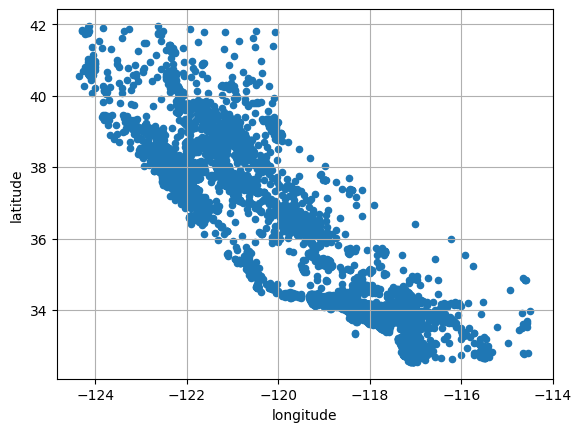

In [59]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

This looks like california . setting the alpha option to 0.1 makes it easier to  visualize the places where there is a high density of data points

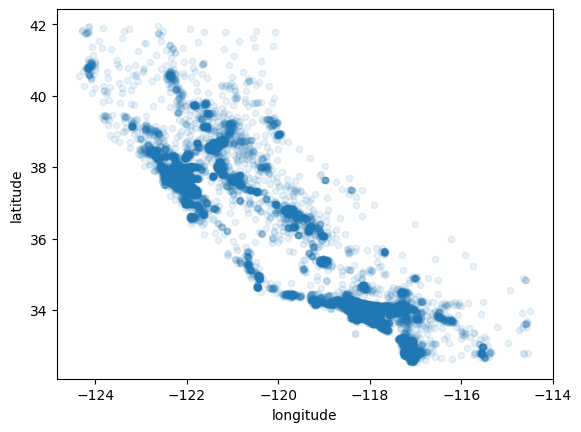

In [62]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

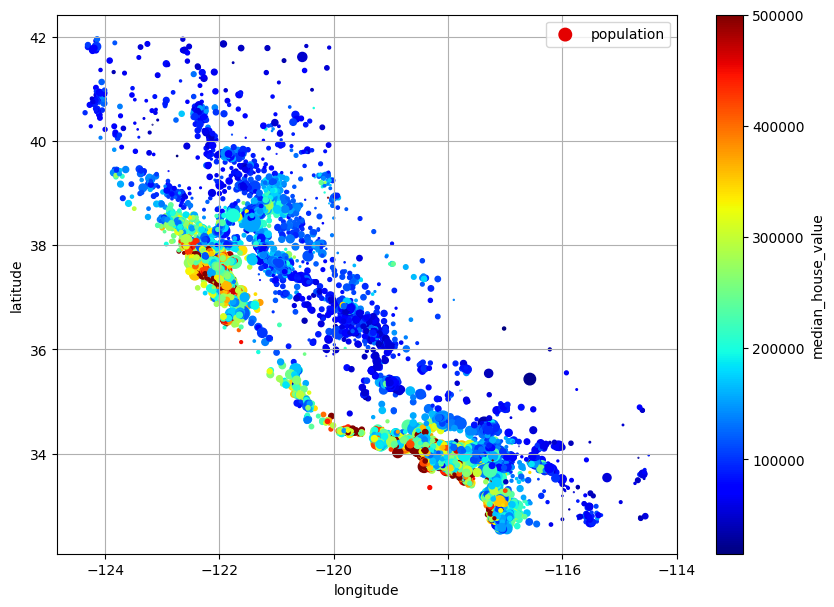

In [71]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", c="median_house_value", cmap="jet", colorbar=True,legend=True, sharex=False, figsize=(10, 7))
plt.show()